<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Simple Linear Regression

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

-   Use scikit-learn to implement simple Linear Regression
-   Create a model, train,test and use the model


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [6]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=6dc6c1a8eb288a0ccdb67d257d7042a9b1e721f3fe6ca64afbc643ebe7334376
  Stored in directory: c:\users\frank\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


You should consider upgrading via the 'd:\python39\python.exe -m pip install --upgrade pip' command.


Processing c:\users\frank\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38\wget-3.2-py3-none-any.whl
  Attempting uninstall: wget
    Found existing installation: wget 3.2
    Uninstalling wget-3.2:
      Successfully uninstalled wget-3.2


You should consider upgrading via the 'd:\python39\python.exe -m pip install --upgrade pip' command.


### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.


In [7]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [9]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

Lets first have a descriptive exploration on our data.


In [10]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.


In [11]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these fearues:


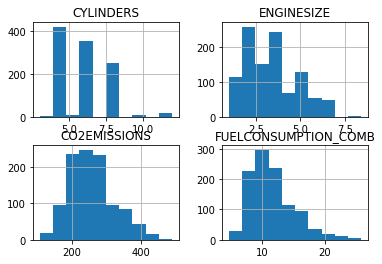

In [12]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:


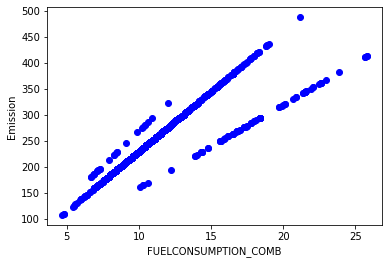

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

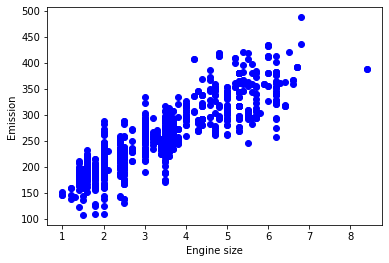

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice

Plot **CYLINDER** vs the Emission, to see how linear is their relation:


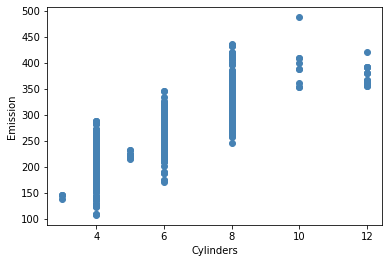

In [16]:
# write your code here
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='Steelblue')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()



<details><summary>Click here for the solution</summary>

```python
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using **np.random.rand()** function: 


In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Train data distribution


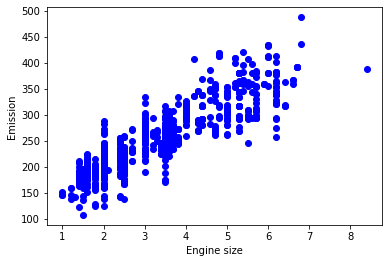

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling

Using sklearn package to model data.


In [20]:
!pip install sklearn

You should consider upgrading via the 'd:\python39\python.exe -m pip install --upgrade pip' command.



  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=21b8824d0603a4e8aa9835f9725d98c240e7da869803a7b59a079716f213d4f1
  Stored in directory: c:\users\frank\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [72]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.60574672]]
Intercept:  [123.32388828]


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [229]:
y_data = cdf['CO2EMISSIONS']
x_data = cdf[['ENGINESIZE']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=42)

In [230]:
lm= LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [215]:
lm.coef_

array([38.65069602])

In [216]:
lm.intercept_

127.5626927035733

In [234]:
yhat = lm.predict(x_test)
len(yhat)

427

In [2]:
import plotly.express as px

In [3]:
fig = px.scatter(df, x=x_test['ENGINESIZE'], y=yhat,
                 width=800, height=400)

NameError: name 'df' is not defined

In [137]:
test_y = lm.predict(x_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , test_y) )

Mean absolute error: 22.94
Residual sum of squares (MSE): 940.05
R2-score: 0.78


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


In [68]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()


### Cross Validation

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [110]:
Rcross = cross_val_score(lm, x_data, y_data, cv=4)

In [111]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.7530572126811899 and the standard deviation is 0.022805207658362154


In [112]:
Rcross1 = cross_val_score(lm,x_data,y_data, cv=6)
Rcross1.mean()

0.7512827231516598

In [113]:
yhat2 = cross_val_predict(lm,x_data, y_data,cv=4)
print(x_data[0:5])
print('Predicted', yhat[0:5])
print('Actual Values',y_test[0:5].values)

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5
Predicted [243.63685702 181.55131265 204.83339179 204.83339179 305.72240138]
Actual Values [274 200 196 161 320]


In [109]:
import pandas as pd


In [206]:
results = pd.DataFrame(x_test,y_test).reset_index()

In [207]:
results['PredictedEmissions'] = yhat

In [208]:
results.head(25)

,CO2EMISSIONS,ENGINESIZE,PredictedEmissions
0,304,NaN,309.220964
1,221,5.3,262.840129
2,294,2.4,266.705198
3,221,5.3,243.514781
4,207,NaN,204.864085
5,246,NaN,243.514781
6,259,1.2,266.705198
7,310,3.6,282.165477
8,310,3.6,320.816173
9,264,NaN,266.705198


In [246]:
fig = px.scatter(results, x='ENGINESIZE', y=['PredictedEmissions','CO2EMISSIONS'],
                 width=800, height=400, title = 'Predicted CO2EMISSIONS vs Actual CO2EMISSIONS')

TypeError: scatter() got an unexpected keyword argument 'ylabel'

In [263]:
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    yaxis=dict(
        title_text="Amount of Emission",
        tickmode="array",
        titlefont=dict(size=15)),
    xaxis=dict(
        title_text="Engine Size",
        ticktext=["1", "2", "3", "4","5","6"],
        tickvals=[1, 2, 3, 4,5,6],
        tickmode="array",
        titlefont=dict(size=15))
)

#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

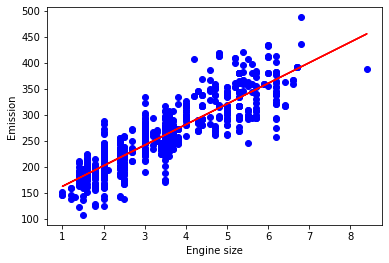

In [142]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 

```
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
```


In [37]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.88
Residual sum of squares (MSE): 1004.08
R2-score: 0.71


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-03        | 2.1     | Lakshmi Holla | Changed URL of the csv             |
| 2020-08-27        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |
|                   |         |               |                                    |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
